Optimal number of clusters: 7
Minimum Davies-Bouldin Index: 3.4569


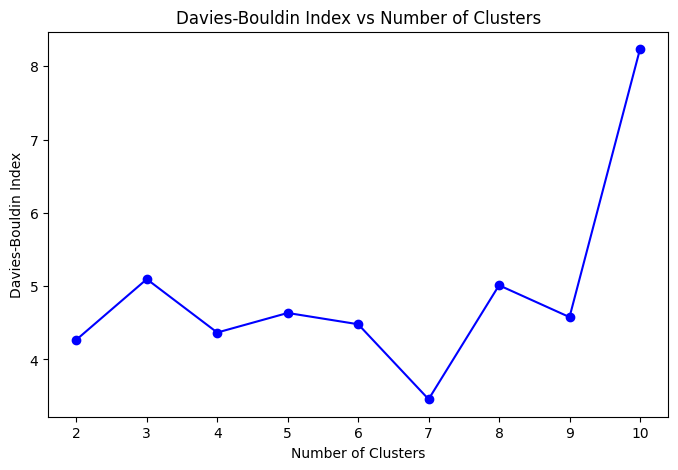

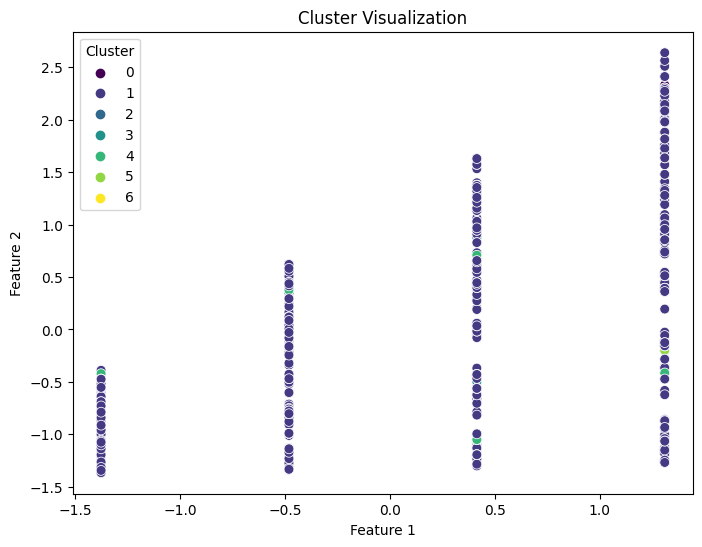

Final Clustering Results with 7 Clusters
Cluster
1    962
3     12
2      7
4      6
0      5
6      5
5      3
Name: count, dtype: int64


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/kaggle/input/zeotap-dataset/Customers.csv")
transactions = pd.read_csv("/kaggle/input/zeotap-dataset/Transactions.csv")

# Merge datasets on a common key (assume 'CustomerID' is the common column)
data = pd.merge(customers, transactions, on="CustomerID")

# Handle missing values
# Fill numeric columns with mean
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

# Fill categorical columns with mode
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert categorical data to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (between 2 and 10) using Davies-Bouldin Index
db_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_index)

# Determine the optimal number of clusters
optimal_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Minimum Davies-Bouldin Index: {min(db_scores):.4f}")

# Final clustering with optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = final_kmeans.fit_predict(scaled_data)

# Visualize the Davies-Bouldin Index for different cluster counts
plt.figure(figsize=(8, 5))
plt.plot(k_range, db_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.show()

# Visualize the clusters (assume 2D visualization for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0], 
    y=scaled_data[:, 1], 
    hue=data['Cluster'], 
    palette='viridis', 
    s=50
)
plt.title("Cluster Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Print final clustering results
print(f"Final Clustering Results with {optimal_k} Clusters")
print(data['Cluster'].value_counts())

# Save the output
data.to_csv("zeotap_clustered_data.csv", index=False)
